   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

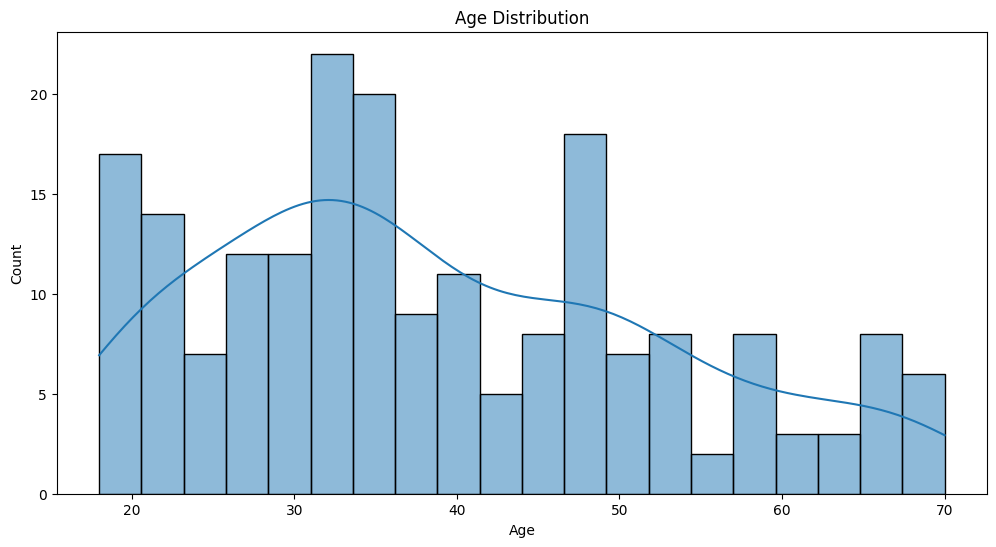

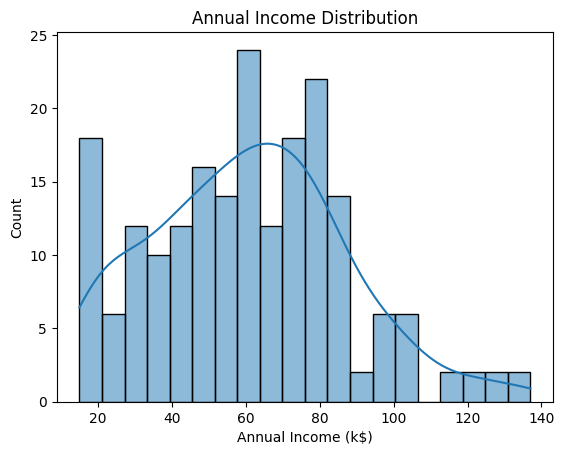

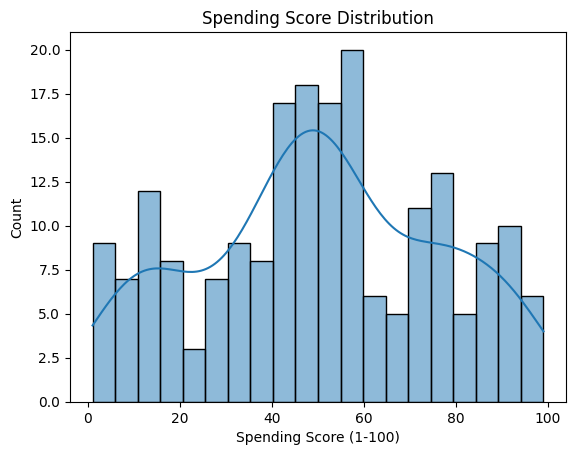

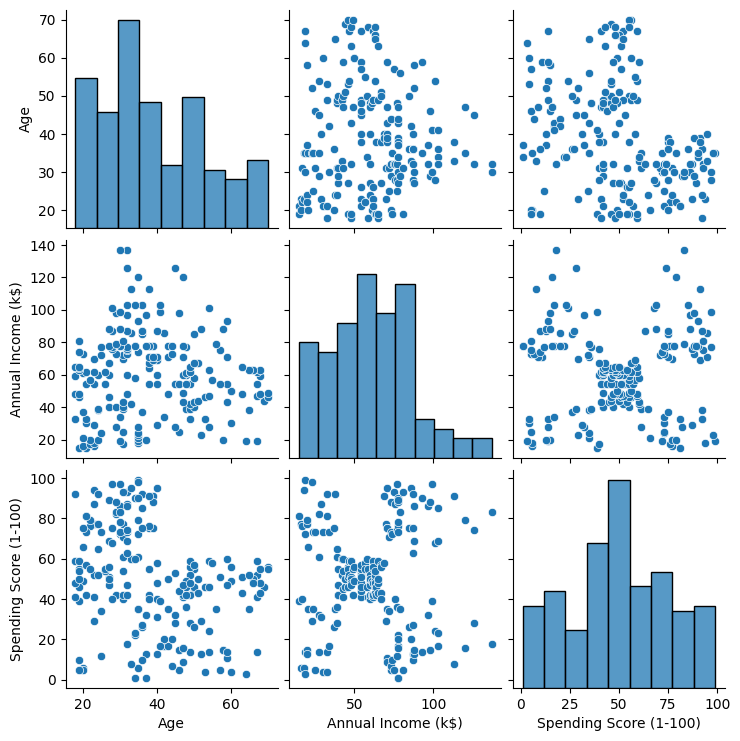

KeyError: 'Gender'

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load Dataset (Ensure correct file path)
file_path = "Mall_Customers.csv"  # If file is in the same directory
# file_path = r"C:\Users\A1 computer\Downloads\AI LAB\Mall_Customers.csv"  # Use full path if needed

df = pd.read_csv(file_path)

# Display basic info about data
print(df.head())  # Show first 5 rows
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics
print("Missing values:\n", df.isnull().sum())  # Check for missing values

# Data Visualization
plt.figure(figsize=(12, 6))

# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Annual Income Distribution
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

# Spending Score Distribution
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()

# Pairplot for feature relationships
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Data Preprocessing
df = df.drop(columns=['CustomerID'])  # Remove non-relevant column
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Encode Gender

# Standardizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# K-Means Clustering - Finding Optimal K using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Fixing warning
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow Method Plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with Optimal K (from the elbow method)
optimal_k = 5  # Adjust based on elbow graph
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Scatter plot of Segments
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.legend(title="Cluster")
plt.show()

# Hierarchical Clustering (Dendrogram)
plt.figure(figsize=(10, 5))
linked = linkage(scaled_data, method='ward')
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Save results
df.to_csv("customer_segments.csv", index=False)
print("Customer segmentation results saved to 'customer_segments.csv'")
